<a href="https://colab.research.google.com/github/maeve70/BaseballCapstone/blob/master/AL%26NLBatting1998_2008Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math


# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

I got all the batting data from baseball-reference dot com. Path: Seasons>All Seasons>League>Batting> then the years (from the middle of the page). On the webpage itself you can then remove the columns you don't want and export it as a csv. I did that for both leages, years 1998-2008, or, what's been called "The Steroid Era." I then cleaned up 14K rows of data in Excel and combined AL & NL years, saved as a csv file.

Following the years of changes to the evolving MLB drug policy (listed below before the statistical testing portion), I want to compare decades, specifically the “steroid era” or, 1998-2008, (in 1998, McGwire admitted to using a (then legal) drug that was related to steroids) to see if there is a statistically significant difference in the years for both leagues as well as the numbers for players in that time period. Other questions I have: Is one League more dominant than the other? How do those who tested positive &/or were suspended with PED use compare to the rest of the players? My null hypothesis is that drug use had no effect on the HR numbers over the various decades. Let's see what we find!
*I decided to focus on HR numbers b/c OBP (on base %), SLG (Slugging %) & OPS (on-base + SLG) were already averages.*

All my csv files have been shared via my GitHub repo.  There are 3 files in this notebook.

This file (below) is just batting totals by league per year from 1876-2019. No specific breakdown by team or players


In [9]:
BattingTotals = pd.read_csv('https://raw.githubusercontent.com/maeve70/BaseballCapstone/master/AL_NL_BattingTotals.csv')

this file (below) is all the players who tested positive/were suspended & their records from 98-2008.

In [12]:
PlayersPED = pd.read_csv('https://raw.githubusercontent.com/maeve70/BaseballCapstone/master/Players.csv')

This Players file is a list of all the players who tested positive in and/or were suspended. I got the list of names from Wikipedia & BleacherReport. All info available online.

The 98-2008 file (below) has every player, for the years 1998-2008, all teams and every team they played for batting totals. I compiled this dataset from the website, Baseball Reference dot com. This is the file to focus on and analyze.

In [4]:
AL_NLbatting98_2008 = pd.read_csv("https://raw.githubusercontent.com/maeve70/BaseballCapstone/master/AL_NL_98-2008BattingUpdated.csv")

In [5]:
AL_NLbatting98_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13487 entries, 0 to 13486
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     13487 non-null  int64  
 1   League   13487 non-null  object 
 2   Name     13487 non-null  object 
 3   Age      13465 non-null  float64
 4   Team     13465 non-null  object 
 5   G        13487 non-null  int64  
 6   PA       13487 non-null  int64  
 7   AB       13487 non-null  int64  
 8   R        13487 non-null  int64  
 9   H        13487 non-null  int64  
 10  2B       13487 non-null  int64  
 11  3B       13487 non-null  int64  
 12  HR       13487 non-null  int64  
 13  RBI      13487 non-null  int64  
 14  BB       13487 non-null  int64  
 15  SO       13487 non-null  int64  
 16  Hits/AB  11265 non-null  float64
 17  OBP      11310 non-null  float64
 18  SLG      11265 non-null  float64
 19  OPS      11265 non-null  float64
 20  TB       13486 non-null  float64
dtypes: float64(6

This df (below) is annual totals from the years 1867-2019. (both leagues)

In [11]:
BattingTotals.head(2)

,Year,League,Teams,No of Bat,Batter Age,Runs Scored per gm,Games,Plate app,At Bats,Runs,Hits,2B,3B,HR,RBI,Walks,SO,Hits/AB,OBP,SLG,OPS,TB
0,2019,AL,15,543,27.9,4.90,1873,71893,64404,9182,16356,3359,300,2688,8754,6103,16338,0.254,0.323,0.441,0.764,28379
1,2018,AL,15,603,28.2,4.53,2430,92254,82710,10999,20615,4271,390,2900,10490,7637,20206,0.249,0.318,0.415,0.734,34366


In [10]:
BattingTotals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                263 non-null    int64  
 1   League              263 non-null    object 
 2   Teams               263 non-null    int64  
 3   No of Bat           263 non-null    int64  
 4   Batter Age          263 non-null    float64
 5   Runs Scored per gm  263 non-null    float64
 6   Games               263 non-null    int64  
 7   Plate app           263 non-null    int64  
 8   At Bats             263 non-null    int64  
 9   Runs                263 non-null    int64  
 10  Hits                263 non-null    int64  
 11  2B                  263 non-null    int64  
 12  3B                  263 non-null    int64  
 13  HR                  263 non-null    int64  
 14  RBI                 263 non-null    int64  
 15  Walks               263 non-null    int64  
 16  SO      

This DF(below) is a list of players who tested positive and/or were suspended.

In [16]:
PlayersPED = pd.read_csv('https://raw.githubusercontent.com/maeve70/BaseballCapstone/master/Players.csv', header=None)

In [17]:
PlayersPED.columns = ['Name']
PlayersPED.head()

,Name
0,Aaron Boone
1,Adrian Beltre
2,Alex Rodriguez
3,Alfonso Soriano
4,Andres Galarraga


In [18]:
PlayersPED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    76 non-null     object
dtypes: object(1)
memory usage: 736.0+ bytes


In [19]:
PlayersPositive = PlayersPED['Name'].unique()

print(PlayersPositive)

['Aaron\xa0Boone' 'Adrian\xa0Beltre' 'Alex\xa0Rodriguez'
 'Alfonso\xa0Soriano' 'Andres\xa0Galarraga' 'Aramis\xa0Ramirez'
 'Barry\xa0Bonds' 'Ben\xa0Weber' 'Benito\xa0Santiago' 'Bobby\xa0Abreu'
 'Brent\xa0Abernathy' 'Bret\xa0Boone' 'Brian\xa0Roberts' 'Carl\xa0Everett'
 'Carlos\xa0Delgado' 'Casey\xa0Blake' 'Cliff\xa0Floyd'
 'Corey\xa0Patterson' 'Craig\xa0Monroe' 'Craig\xa0Wilson' 'Dan\xa0Smith'
 'Danys\xa0Baez' 'David\xa0Ortiz' 'Derrek\xa0Lee' 'Dmitri\xa0Young'
 'Eric\xa0Byrnes' 'Eric\xa0Chavez' 'Fernando\xa0Tatis'
 'Frank\xa0Catalanotto' 'Freddy\xa0Garcia' 'Gary\xa0Matthews'
 'Gary\xa0Sheffield' 'Geoff\xa0Jenkins' 'Ivan\xa0Rodriguez'
 'Jason\xa0Giambi' 'Javy\xa0Lopez' 'Jay\xa0Gibbons' 'Jeromy\xa0Burnitz'
 'Jerry\xa0Hairston' 'Johnny\xa0Damon' 'Jose\xa0Canseco'
 'Jose\xa0Contreras' 'Jose\xa0Guillen' 'Juan\xa0Gonzalez' 'Kris\xa0Benson'
 'Luis\xa0Gonzalez' 'Magglio\xa0Ordonez' 'Manny\xa0Ramirez'
 'Mark\xa0McGwire' 'Melvin\xa0Mora' 'Miguel\xa0Tejada' 'Mike\xa0Cameron'
 'Milton\xa0Bradley' 'M



Create a DF with the players who tested positive and/or were suspended. ie: remove the players from the AL_NL98_2008 DF.

In [20]:
Positive= AL_NLbatting98_2008[AL_NLbatting98_2008['Name'].isin(PlayersPositive)]
Positive['tested'] = "positive"
Positive.head(5)

,Year,League,Name,Age,Team,G,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,Hits/AB,OBP,SLG,OPS,TB,tested
6,1998,AL,Roberto Alomar,30.0,BAL,147,657,588,86,166,36,1,14,56,59,70,0.282,0.347,0.418,0.765,246.0,positive
7,1998,AL,Sandy Alomar,32.0,CLE,117,438,409,45,96,26,2,6,44,18,45,0.235,0.270,0.352,0.622,144.0,positive
65,1998,AL,Mike Cameron,25.0,CHW,141,443,396,53,83,16,5,8,43,37,101,0.210,0.285,0.336,0.621,133.0,positive
67,1998,AL,Jose Canseco,33.0,TOR,151,658,583,98,138,26,0,46,107,65,159,0.237,0.318,0.518,0.836,302.0,positive
76,1998,AL,Frank Catalanotto,24.0,DET,89,234,213,23,60,13,2,6,25,12,39,0.282,0.325,0.446,0.771,95.0,positive


In [21]:
Positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 6 to 13482
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     766 non-null    int64  
 1   League   766 non-null    object 
 2   Name     766 non-null    object 
 3   Age      766 non-null    float64
 4   Team     766 non-null    object 
 5   G        766 non-null    int64  
 6   PA       766 non-null    int64  
 7   AB       766 non-null    int64  
 8   R        766 non-null    int64  
 9   H        766 non-null    int64  
 10  2B       766 non-null    int64  
 11  3B       766 non-null    int64  
 12  HR       766 non-null    int64  
 13  RBI      766 non-null    int64  
 14  BB       766 non-null    int64  
 15  SO       766 non-null    int64  
 16  Hits/AB  747 non-null    float64
 17  OBP      747 non-null    float64
 18  SLG      747 non-null    float64
 19  OPS      747 non-null    float64
 20  TB       766 non-null    float64
 21  tested   766 n

Also create a df without the players in order to compare.


*Keep in mind: There are 766 rows b/c players' names appear more than once--ie: they played for more than one team.

In [22]:
Positive.shape

(766, 22)

Create a DF with all the other players who did not test positive for PEDs.

In [23]:
#Or for "NOT IN", use: ~something.isin(somewhere)
#Ex: df[~df.countries.isin(countries)]

NoPEDs = AL_NLbatting98_2008[~AL_NLbatting98_2008['Name'].isin(PlayersPositive)]
NoPEDs['tested'] = 'negative'
NoPEDs.head(5)

,Year,League,Name,Age,Team,G,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,Hits/AB,OBP,SLG,OPS,TB,tested
0,1998,AL,Jeff Abbott,25.0,CHW,89,261,244,33,68,14,1,12,41,9,28,0.279,0.298,0.492,0.790,120.0,negative
1,1998,AL,Kurt Abbott,29.0,OAK,35,136,123,17,33,7,1,2,9,10,34,0.268,0.326,0.390,0.716,48.0,negative
2,1998,AL,Rick Aguilera,36.0,MIN,5,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,negative
3,1998,AL,Scott Aldred,30.0,TBD,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,negative
4,1998,AL,Luis Alicea,32.0,TEX,101,308,259,51,71,15,3,6,33,37,40,0.274,0.372,0.425,0.796,110.0,negative


In [24]:
NoPEDs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12721 entries, 0 to 13486
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     12721 non-null  int64  
 1   League   12721 non-null  object 
 2   Name     12721 non-null  object 
 3   Age      12699 non-null  float64
 4   Team     12699 non-null  object 
 5   G        12721 non-null  int64  
 6   PA       12721 non-null  int64  
 7   AB       12721 non-null  int64  
 8   R        12721 non-null  int64  
 9   H        12721 non-null  int64  
 10  2B       12721 non-null  int64  
 11  3B       12721 non-null  int64  
 12  HR       12721 non-null  int64  
 13  RBI      12721 non-null  int64  
 14  BB       12721 non-null  int64  
 15  SO       12721 non-null  int64  
 16  Hits/AB  10518 non-null  float64
 17  OBP      10563 non-null  float64
 18  SLG      10518 non-null  float64
 19  OPS      10518 non-null  float64
 20  TB       12720 non-null  float64
 21  tested   127

In [25]:
NoPEDs.shape

(12721, 22)

This is the file with all the players who tested positive/were suspended & their batting totals for 1998-2008.

In [ ]:
#PositiveHRs = pd.read_csv("PositiveHRs98_2008.csv")
#PositiveHRs.head()

In [ ]:
#PositiveHRs[["HR"]].describe()

In [ ]:
#PositiveHRs.info()

What does the 98_2008 (all players) DF look like?

In [26]:
AL_NLbatting98_2008.head()

,Year,League,Name,Age,Team,G,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,Hits/AB,OBP,SLG,OPS,TB
0,1998,AL,Jeff Abbott,25.0,CHW,89,261,244,33,68,14,1,12,41,9,28,0.279,0.298,0.492,0.790,120.0
1,1998,AL,Kurt Abbott,29.0,OAK,35,136,123,17,33,7,1,2,9,10,34,0.268,0.326,0.390,0.716,48.0
2,1998,AL,Rick Aguilera,36.0,MIN,5,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0
3,1998,AL,Scott Aldred,30.0,TBD,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0
4,1998,AL,Luis Alicea,32.0,TEX,101,308,259,51,71,15,3,6,33,37,40,0.274,0.372,0.425,0.796,110.0


In [ ]:
AL_NLbatting98_2008.shape

(13487, 21)

In [ ]:
AL_NLbatting98_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13487 entries, 0 to 13486
Data columns (total 21 columns):
Year       13487 non-null int64
League     13487 non-null object
Name       13487 non-null object
Age        13465 non-null float64
Team       13465 non-null object
G          13487 non-null int64
PA         13487 non-null int64
AB         13487 non-null int64
R          13487 non-null int64
H          13487 non-null int64
2B         13487 non-null int64
3B         13487 non-null int64
HR         13487 non-null int64
RBI        13487 non-null int64
BB         13487 non-null int64
SO         13487 non-null int64
Hits/AB    11265 non-null float64
OBP        11310 non-null float64
SLG        11265 non-null float64
OPS        11265 non-null float64
TB         13486 non-null float64
dtypes: float64(6), int64(12), object(3)
memory usage: 2.2+ MB


In [ ]:
AL_NLbatting98_2008.isnull().sum()

Year          0
League        0
Name          0
Age          22
Team         22
G             0
PA            0
AB            0
R             0
H             0
2B            0
3B            0
HR            0
RBI           0
BB            0
SO            0
Hits/AB    2222
OBP        2177
SLG        2222
OPS        2222
TB            1
dtype: int64

In [ ]:
AL_NLbatting98_2008.isnull().sum().sum()

8888

There are nulls b/c at the end of each year in both leagues, there's a row called "League Avg". I'm not going to delete any NULLs. 


Let's see what the stats say for the HR column for the years 1998-2008, both leagues:

In [ ]:
AL_NLbatting98_2008[['HR']].describe()

,HR
count,13487.000000
mean,4.305405
std,8.299582
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,73.000000


Let's isolate the NL (98-2008) for later to compare HRs to the AL.

In [ ]:
NL_batting98_2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['League']== "NL").values]
NL_batting98_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7920 entries, 507 to 13486
Data columns (total 21 columns):
Year       7920 non-null int64
League     7920 non-null object
Name       7920 non-null object
Age        7909 non-null float64
Team       7909 non-null object
G          7920 non-null int64
PA         7920 non-null int64
AB         7920 non-null int64
R          7920 non-null int64
H          7920 non-null int64
2B         7920 non-null int64
3B         7920 non-null int64
HR         7920 non-null int64
RBI        7920 non-null int64
BB         7920 non-null int64
SO         7920 non-null int64
Hits/AB    6739 non-null float64
OBP        6769 non-null float64
SLG        6739 non-null float64
OPS        6739 non-null float64
TB         7919 non-null float64
dtypes: float64(6), int64(12), object(3)
memory usage: 1.3+ MB


Isolate the AL for HR's 1998-2008

In [ ]:
AL_batting98_2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['League']== "AL").values]
AL_batting98_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5567 entries, 0 to 12741
Data columns (total 21 columns):
Year       5567 non-null int64
League     5567 non-null object
Name       5567 non-null object
Age        5556 non-null float64
Team       5556 non-null object
G          5567 non-null int64
PA         5567 non-null int64
AB         5567 non-null int64
R          5567 non-null int64
H          5567 non-null int64
2B         5567 non-null int64
3B         5567 non-null int64
HR         5567 non-null int64
RBI        5567 non-null int64
BB         5567 non-null int64
SO         5567 non-null int64
Hits/AB    4526 non-null float64
OBP        4541 non-null float64
SLG        4526 non-null float64
OPS        4526 non-null float64
TB         5567 non-null float64
dtypes: float64(6), int64(12), object(3)
memory usage: 956.8+ KB


In the AL_NLbatting98_2008 DF there are rows that are labeled "League Avg/600 PA". What are the League Avg per 600 Plate Appearances (PA)/Year? Why is it per 600? Because 550 is the average number of At Bats (AB). Plate appearances (PA) includes walks and hit by pitch (HBP). For a player to be considered for a batting title the number of PA has to be 502.
There is a row for every year in the 98-2008 DF that lists the League Avg. This just gives us an idea of what the Leagues averages were for various baseball stats. Again, it's an average already, so, for testing purposed later on, it's not super helpful. It just gives us an idea of where players were at with reagrds to hitting.

In [ ]:
#AL_NL_batting98 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 1998).values]
#AL_NL_batting98.info()

league_avg98_2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Name']== 'LgAvg per 600 PA').values]
league_avg98_2008.head(23)

,Year,League,Name,Age,Team,G,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,Hits/AB,OBP,SLG,OPS,TB
506,1998,AL,LgAvg per 600 PA,NaN,NaN,165,600,534,77,144,29,3,17,73,53,98,0.270,0.339,0.429,0.768,229.0
1212,1998,NL,LgAvg per 600 PA,NaN,NaN,217,600,532,71,139,27,3,15,68,52,104,0.261,0.331,0.409,0.740,218.0
1716,1999,AL,LgAvg per 600 PA,NaN,NaN,163,600,530,80,146,28,3,18,75,56,95,0.275,0.347,0.439,0.786,233.0
2392,1999,NL,LgAvg per 600 PA,NaN,NaN,219,600,528,76,141,27,3,17,72,57,102,0.268,0.342,0.427,0.769,NaN
2907,2000,AL,LgAvg per 600 PA,NaN,NaN,164,600,529,81,146,29,3,18,77,58,95,0.276,0.349,0.443,0.792,235.0
3652,2000,NL,LgAvg per 600 PA,NaN,NaN,219,600,526,77,139,27,3,18,73,58,104,0.265,0.340,0.428,0.769,225.0
4161,2001,AL,LgAvg per 600 PA,NaN,NaN,164,600,536,75,143,29,3,17,72,50,100,0.266,0.333,0.428,0.761,229.0
4891,2001,NL,LgAvg per 600 PA,NaN,NaN,225,600,531,73,138,28,3,18,70,52,109,0.260,0.331,0.424,0.754,225.0
5382,2002,AL,LgAvg per 600 PA,NaN,NaN,163,600,535,75,141,29,3,17,71,51,98,0.263,0.331,0.424,0.755,227.0
6074,2002,NL,LgAvg per 600 PA,NaN,NaN,225,600,530,69,137,27,3,16,66,53,103,0.259,0.331,0.410,0.741,217.0


What's the league average for HRs for every year during 1998-2008?

In [ ]:
league_avg98_2008[['HR']].describe()

,HR
count,22.000000
mean,16.772727
std,0.922307
min,15.000000
25%,16.000000
50%,17.000000
75%,17.000000
max,18.000000


Let's create DFs for each year 98-2008. Calculate the mean, median, mode, etc of the HR column for both leagues from 98-2008 so we can then do statistical testing between the years. Remember, this DF has every player's stats for all years.

In [ ]:
AL_NL_batting98 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 1998).values]
AL_NL_batting98[['HR']].describe()

,HR
count,1213.000000
mean,4.201154
std,8.506982
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,70.000000


In [ ]:
AL_NL_batting99 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 1999).values]
AL_NL_batting99[['HR']].describe()

,HR
count,1180.000000
mean,4.714407
std,9.082543
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,65.000000


In [ ]:
AL_NL_batting2000 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2000).values]
AL_NL_batting2000[['HR']].describe()

,HR
count,1260.000000
mean,4.546825
std,8.681288
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,50.000000


In [ ]:
AL_NL_batting2001 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2001).values]
AL_NL_batting2001[['HR']].describe()

,HR
count,1239.000000
mean,4.433414
std,8.807594
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,73.000000


In [ ]:
AL_NL_batting2002 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2002).values]
AL_NL_batting2002[['HR']].describe()

,HR
count,1183.000000
mean,4.304311
std,8.131868
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,57.000000


In [ ]:
AL_NL_batting2003 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2003).values]
AL_NL_batting2003[['HR']].describe()

,HR
count,1221.000000
mean,4.291564
std,8.099899
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,47.000000


In [ ]:
AL_NL_batting2004 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2004).values]
AL_NL_batting2004[['HR']].describe()

,HR
count,1216.000000
mean,4.511513
std,8.379371
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,48.000000


In [ ]:
AL_NL_batting2005 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2005).values]
AL_NL_batting2005[['HR']].describe()

,HR
count,1215.000000
mean,4.156379
std,7.936750
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,51.000000


In [ ]:
AL_NL_batting2006 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2006).values]
AL_NL_batting2006[['HR']].describe()

,HR
count,1244.000000
mean,4.356913
std,8.354935
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,58.000000


In [ ]:
AL_NL_batting2007 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2007).values]
AL_NL_batting2007[['HR']].describe()

,HR
count,1258.000000
mean,3.965024
std,7.677492
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,54.000000


In [ ]:
AL_NL_batting2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2008).values]
AL_NL_batting2008[['HR']].describe()

,HR
count,1258.000000
mean,3.903021
std,7.541145
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,48.000000


Again, (as above, for memory's sake) this is HRs 1998-2008, both leagues.

In [ ]:
AL_NLbatting98_2008[['HR']].describe()

,HR
count,13487.000000
mean,4.305405
std,8.299582
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,73.000000


I also imported batting totals for the entire history of the MLB (at the top of this notebook, (AL_NL_BattingTotals.csv), however, The NL has been in existence longer (since 1876) than the AL (est. 1901), and the numbers of teams has not always been equal. This is the cumulative batting totals (below) for both leagues, all years from 1876-2019 with HR's isolated. Not very accurate b/c of the unequal number of teams in the early years and 2019 isn't complete yet. I just wanted to see what the stats breakdown of HRs was here. I don't think I'll use this for testing. I just wanted to see what the stats were.

In [ ]:
batting_totals_df[['HR']].describe()

,HR
count,263.000000
mean,1152.456274
std,858.491068
min,23.000000
25%,435.500000
50%,973.000000
75%,1775.000000
max,3170.000000


I created a df with the players who tested positive for PEDs and/or were suspended. Let's look at HRs in the Positive DF and test that against the NoPEDs DF.

In [ ]:
Positive[['HR']].describe()

,HR
count,766.000000
mean,16.950392
std,14.250977
min,0.000000
25%,5.000000
50%,14.000000
75%,26.000000
max,73.000000


Let's see what the numbers are for the players who didn't take PEDs:

In [ ]:
NoPEDs[['HR']].describe()

,HR
count,12721.000000
mean,3.543982
std,7.113951
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,58.000000


*Statistical testing for significance between the different DFs. I tried several different combinations of years for testing. As I mentioned above, I have chosen to focus on what in the sports world, has been referred to as "The Steroid Era", or 1998-2008. (McGwire admitted to using illegal substances in 1998).*

*Note, I did not include the tests for the years where there was no significance. I chose these years below as there was statistical significance. That, and they sort of followed the changes in the MLB illegal substances policy as it changed over the years.*

Brief history of drug testing in MLB (that's relevant to this study):

    1991- Steroids made the list of banned substances. However, there wasn't official testing in MLB.

    2003-2004- The Players Assoc. (MLBPA) & owners agreed on a new (anonymous) testing policy*. Urine tests for banned substances began. 'MLB says between 5 and 7 percent of 1,438 anonymous tests were positive for steroids, triggering the start of testing with penalties in 2004. A first positive test results in treatment and a second in a 15-day suspension without pay or fine of up to 10K. Penalties increase to a 25-day suspension or fine of up to 25K for a third positive test, a 50-day suspension or fine of up to 50K for a fourth and a one-year suspension or fine of up to 100K for a fifth.' (USA Today, 2014).

*Also, of important note: It was learned later that the results of these tests were then turned over to an investigation into BALCO (Bay Area Laboratory Co-Operative investigation). A list of players was leaked and became published online in many venues. (Also, if you looked at some players like Sosa, McGwire, Bonds, Palmiero, you could tell they were super bulked up and had very different physiques than they had in years prior.)

    2005- Drug tests when players report to spring training and then once again on a random date. All players are tested. The players & owners agreed again on stronger penalties: 1st time: 50-day suspension, 2nd time: 100-day ban, 3rd: lifetime

    2006- Then Commissioner of the MLB, Bud Selig, ordered an investigation into illegal substances in MLB. He appointed Sen. George Mitchell, who led a 20 month investigation into steroid and HGH (human growth hormone, also banned) use in MLB. Former batboys, clubhouse attendants and trainers were questioned. Out of 5 players that were asked to co-operate b/c of their public comments about testing and drug use in MLB, only one, Frank Thomas gave testimony.
The results of the investigation were published in a report in December 2007. Mitchell's investigation focused on "high profile" players. (online, Wikipedia, espn, etc.)

The policy has changed since the Report came out and penalties have become more strict including heavy fines for not attending treatment programs.

Let's first look to see if there are any significant differences between the DFs Positive and NoPEDs. (Positive is players who tested positive for PEDs)

In [ ]:
stats.ttest_ind(Positive['HR'], NoPEDs['HR'])

Ttest_indResult(statistic=46.81168111314479, pvalue=0.0)

In [ ]:
sample_1_n = Positive.shape[0]
sample_2_n = NoPEDs.shape[0]
sample_1_mean = Positive['HR'].mean()
sample_2_mean = NoPEDs['HR'].mean()
sample_1_var = Positive['HR'].var()
sample_2_var = NoPEDs['HR'].var()

sample_1_mean

16.950391644908617

In [ ]:
sample_2_mean

3.5439823913214368

In [ ]:
#define a function b/c you'll use this again

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means of HR's at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(Positive['HR'],NoPEDs['HR'])

"The difference in means of HR's at the 95% confidence interval (two-tail) is between -14.423173923559034 and -12.389644583615326."

In [ ]:
#define Cohen's d function, you'll use again
def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")

get_cohens_d(Positive['HR'], NoPEDs['HR'])


"Cohen's d is: 1.1903327738297478."

So, with a pvalue < 0.05 and at 95% confidence, the difference in the means of HRs is between -14.200118861699487 and -12.209947615737818. The measure of the strength of the relationship between the two variables is large, at 1.1783430030884505. 


The Mitchell Report came out in 2007. I would think there'd be some difference in HRs from 2006- onward. Let's see!

what about Hits?

In [ ]:
stats.ttest_ind(Positive['H'], NoPEDs['H'])

Ttest_indResult(statistic=37.59118424198419, pvalue=3.41810977282577e-294)

In [ ]:
sample_1_n = Positive.shape[0]
sample_2_n = NoPEDs.shape[0]
sample_1_mean = Positive['H'].mean()
sample_2_mean = NoPEDs['H'].mean()
sample_1_var = Positive['H'].var()
sample_2_var = NoPEDs['H'].var()

sample_1_mean

104.10313315926894

In [ ]:
sample_2_mean

32.40138353902995

In [ ]:
get_95_ci(Positive['H'],NoPEDs['H'])

"The difference in means of HR's at the 95% confidence interval (two-tail) is between -76.2548875153757 and -67.14861172510227."

In [ ]:
get_cohens_d(Positive['H'], NoPEDs['H'])

"Cohen's d is: 1.2550702720776568."

So, after testing another stat, Hits for those who tested positive & those who didn't, the means are 104 & 32, respectively. 
the pvalue is <0.05, the difference in the means is -76 & -67, and the CD effect is large.

In [ ]:
stats.ttest_ind(AL_NL_batting98['HR'], AL_NL_batting2008['HR'])

Ttest_indResult(statistic=0.9226581772640108, pvalue=0.3562755198672971)

Not a sig. difference with a pvalue.

In [ ]:
# Calculate the sample size, mean and variance of each sample...
# We will need this information to calculate standard errors

sample_1_n = AL_NL_batting98.shape[0]
sample_2_n = AL_NL_batting2008.shape[0]
sample_1_mean = AL_NL_batting98['HR'].mean()
sample_2_mean = AL_NL_batting2008['HR'].mean()
sample_1_var = AL_NL_batting98['HR'].var()
sample_2_var = AL_NL_batting2008['HR'].var()

sample_1_mean

4.201154163231657

In [ ]:
sample_2_mean

3.90302066772655

In [ ]:
get_95_ci(AL_NL_batting98['HR'],AL_NL_batting2008['HR'])

"The difference in means of HR's at the 95% confidence interval (two-tail) is between -0.9328429268167276 and 0.33657593580651335."

In [ ]:
get_cohens_d(AL_NL_batting98['HR'], AL_NL_batting2008['HR'])


"Cohen's d is: 0.03708781984554997."

CONCLUSION: pvalue is not < 0.05 and the effect size is small between the two means for 1998 & 2008.

Let's try some other years. 2004 & 2008:

In [ ]:
#2004 & 2008
stats.ttest_ind(AL_NL_batting2004['HR'], AL_NL_batting2008['HR'])

Ttest_indResult(statistic=1.89986169363562, pvalue=0.0575675410102583)

In [ ]:
sample_1_n = AL_NL_batting2004.shape[0]
sample_2_n = AL_NL_batting2008.shape[0]
sample_1_mean = AL_NL_batting2004['HR'].mean()
sample_2_mean = AL_NL_batting2008['HR'].mean()
sample_1_var = AL_NL_batting2004['HR'].var()
sample_2_var = AL_NL_batting2008['HR'].var()

sample_1_mean

4.511513157894737

In [ ]:
sample_2_mean

3.90302066772655

In [ ]:
get_95_ci(AL_NL_batting2004['HR'],AL_NL_batting2008['HR'])

"The difference in means of HR's at the 95% confidence interval (two-tail) is between -1.2373667867105107 and 0.02038180637413678."

In [ ]:
get_cohens_d(AL_NL_batting2004['HR'], AL_NL_batting2008['HR'])

"Cohen's d is: 0.07633557048256172."

Conclusion: 2004 & 2008. This is the biggest difference between means so far @ 95% confidence and pvalue of 0.05...This is significant. The CD effect is small.

Let's look at an earlier year compared with 2008, after The Mitchell Report came out. (Testing didn't happen until 2002) 2000 & 2008:

In [ ]:
stats.ttest_ind(AL_NL_batting2000['HR'], AL_NL_batting2008['HR'])

Ttest_indResult(statistic=1.9864232215731958, pvalue=0.04709467425543852)

In [ ]:
sample_1_n = AL_NL_batting2000.shape[0]
sample_2_n = AL_NL_batting2008.shape[0]
sample_1_mean = AL_NL_batting2000['HR'].mean()
sample_2_mean = AL_NL_batting2008['HR'].mean()
sample_1_var = AL_NL_batting2000['HR'].var()
sample_2_var = AL_NL_batting2008['HR'].var()

sample_1_mean

4.546825396825397

In [ ]:
sample_2_mean

3.90302066772655

In [ ]:
get_95_ci(AL_NL_batting2000['HR'],AL_NL_batting2008['HR'])

"The difference in means of HR's at the 95% confidence interval (two-tail) is between -1.2789750277178584 and -0.008634430479834476."

In [ ]:
get_cohens_d(AL_NL_batting2000['HR'], AL_NL_batting2008['HR'])

"Cohen's d is: 0.07917684566445889."

2000 and 2008 difference in means at 95% is between: between -1.2789750277178584 and -0.008634430479834476. 
with a pvalue of 0.047. This is significant. CD is small effect.

The findings for 2004 & 2008, and 2000 & 2008 are both significant. Players tested positive in 2003, plus the penalties were harsher after 2005

1999 & 2007:

In [ ]:
stats.ttest_ind(AL_NL_batting99['HR'], AL_NL_batting2007['HR'])

Ttest_indResult(statistic=2.2047701351673585, pvalue=0.027563377192162956)

Pvalue < 0.05

In [ ]:
sample_1_n = AL_NL_batting99.shape[0]
sample_2_n = AL_NL_batting2008.shape[0]
sample_1_mean = AL_NL_batting99['HR'].mean()
sample_2_mean = AL_NL_batting2008['HR'].mean()
sample_1_var = AL_NL_batting99['HR'].var()
sample_2_var = AL_NL_batting2008['HR'].var()

sample_1_mean

4.714406779661017

In [ ]:
sample_2_mean

3.90302066772655

In [ ]:
get_95_ci(AL_NL_batting99['HR'],AL_NL_batting2007['HR'])

"The difference in means of HR's at the 95% confidence interval (two-tail) is between -1.4191301653679536 and -0.07963569920050295."

In [ ]:
get_cohens_d(AL_NL_batting99['HR'], AL_NL_batting2007['HR'])

"Cohen's d is: 0.0891123911836253."

Pvalue for 1999 & 2007 is <0.05. At 95% confidence, difference between the means is: -1.439857842687028 and -0.14244259303360307. Small effect between the two variables.

In [ ]:
#Keep or not? Probably not!

stats.ttest_ind(AL_NL_batting2000['HR'], AL_NL_batting2007['HR'])

Ttest_indResult(statistic=1.781207487485598, pvalue=0.07499916699830853)

In [ ]:
sample_1_n = AL_NL_batting2000.shape[0]
sample_2_n = AL_NL_batting2007.shape[0]
sample_1_mean = AL_NL_batting2000['HR'].mean()
sample_2_mean = AL_NL_batting2007['HR'].mean()
sample_1_var = AL_NL_batting2000['HR'].var()
sample_2_var = AL_NL_batting2007['HR'].var()

sample_1_mean

4.546825396825397

In [ ]:
sample_2_mean

3.9650238473767887

In [ ]:
get_95_ci(AL_NL_batting2000['HR'],AL_NL_batting2007['HR'])

"The difference in means of HR's at the 95% confidence interval (two-tail) is between -1.2219404821923683 and 0.05833738329515248."

In [ ]:
get_cohens_d(AL_NL_batting2000['HR'], AL_NL_batting2007['HR'])

"Cohen's d is: 0.07099665457744397."

Conclusion: 2000 & 2007: Not a significant p value. Though, the difference in the means (HR) is -1.22 & 0.058 the Cohen's d is very small.

Last one. Is there a difference between HR's in the NL & AL from 1998-2008?

In [ ]:
stats.ttest_ind(NL_batting98_2008['HR'], AL_batting98_2008['HR'])

Ttest_indResult(statistic=-7.644283062553373, pvalue=2.2428382031033772e-14)

In [ ]:
sample_1_n = NL_batting98_2008.shape[0]
sample_2_n = AL_batting98_2008.shape[0]
sample_1_mean = NL_batting98_2008['HR'].mean()
sample_2_mean = AL_batting98_2008['HR'].mean()
sample_1_var = NL_batting98_2008['HR'].var()
sample_2_var = AL_batting98_2008['HR'].var()

sample_1_mean

3.848358585858586

In [ ]:
sample_2_mean

4.955631399317406

In [ ]:
get_95_ci(NL_batting98_2008['HR'],AL_batting98_2008['HR'])

"The difference in means of HR's at the 95% confidence interval (two-tail) is between 0.8195983063786433 and 1.3949473205389973."

In [ ]:
get_cohens_d(NL_batting98_2008['HR'], AL_batting98_2008['HR'])

"Cohen's d is: -0.13281233978393991."

The pvalue is well below <0.05, the difference in the means is between 0.8195983063786433 and 1.3949473205389973 and the effect size/relationship between the variabels is small. So, yes, this is significant.

*Findings*:
I wasn't really sure if I'd be able to reject the null hypothesis, or, if I'd find anything statistically significant for the years of data collected. While I didn't find significance for all years in different combinations of comparisions, I did find 5 different instances of statistical significance in the data (in order of lowest p-value):

    1.) Positive vs. NoPEDs
    2.) AL batting 98-2008 vs. NL natting 98-2008
    3.) 1999 vs. 2007
    4.) 2000 vs 2008
    5.) 2004 vs. 2008
    
I think that my findings here add strength to the argument that PEDs did (negatively) affect baseball. Why should some players have a synthetic (unfair) advantage over others? How is that fair? Further, should those players' numbers have permanent asterisks next to them because they did take some sort of PEDs? Should those players ever appear on a HOF ballot? These are valid questions that people discuss and (often) disagree over to this day.


Let's do some visualizations of the results of the statistical significance tests:

AL & NL batting 98-2008. All players, both leagues:

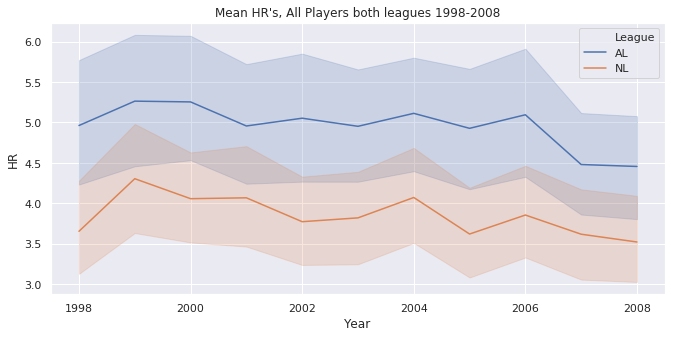

In [ ]:
#sns.set_style="white"
plt.figure(figsize= (11, 5))
ax = sns.lineplot(x="Year", y="HR", hue= "League", data=AL_NLbatting98_2008)
plt.title("Mean HR's, All Players both leagues 1998-2008")
plt.show()

Players who tested positive and/or were suspended vs. those who weren't:

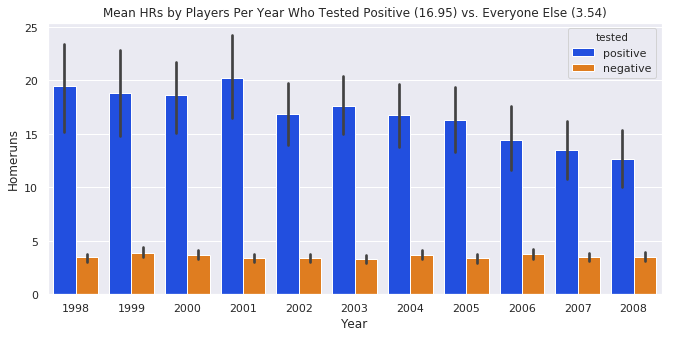

In [ ]:
sns.set_style = "ticks"
plt.figure(figsize = (11,5))
ax = sns.barplot(x='Year', y='HR', palette= "bright", hue= "tested", data = pd.concat([Positive, NoPEDs]))
plt.xlabel('Year')
plt.ylabel('Homeruns')
plt.title('Mean HRs by Players Per Year Who Tested Positive (16.95) vs. Everyone Else (3.54)')
plt.show()

Wow, visualizing the data gives you a different perspective on the stats!

AL & NL Players who tested positive visualized as a lineplot:

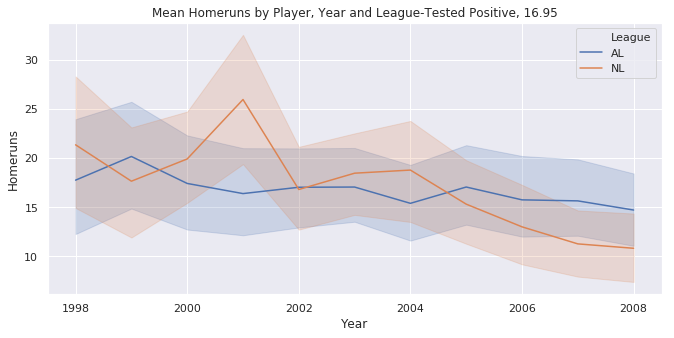

In [ ]:
plt.figure(figsize = (11,5))
sns.lineplot(x="Year", y="HR", hue="League", data= Positive)
plt.xlabel('Year')
plt.ylabel('Homeruns')
plt.title('Mean Homeruns by Player, Year and League-Tested Positive, 16.95')
plt.show()

Mean HRs for players who did not test positive (NoPEDs), visualized as a line plot for comparision:

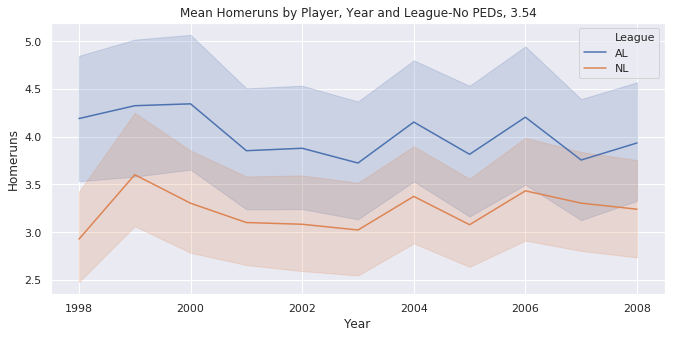

In [ ]:
plt.figure(figsize = (11,5))

sns.lineplot(x="Year", y="HR", hue="League", data= NoPEDs)
plt.xlabel('Year')
plt.ylabel('Homeruns')
plt.title('Mean Homeruns by Player, Year and League-No PEDs, 3.54')
plt.show()

This is the 2nd significant finding, AL vs. NL batting (all players) 1998-2008:

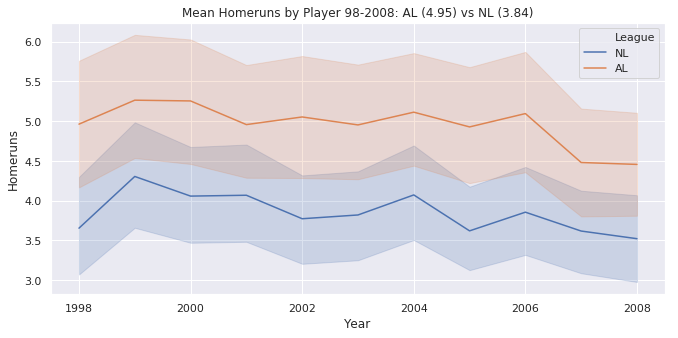

In [ ]:
plt.figure(figsize=(11,5))
sns.lineplot(x="Year", y="HR", hue= "League", data=pd.concat([NL_batting98_2008, AL_batting98_2008]))
plt.xlabel('Year')
plt.ylabel('Homeruns')
plt.title('Mean Homeruns by Player 98-2008: AL (4.95) vs NL (3.84)')
plt.show()


1999 vs. 2007:

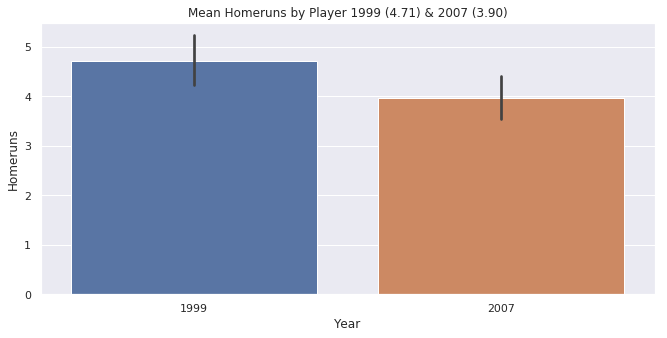

In [ ]:
#1999 & 2007:
plt.figure(figsize = (11,5))
sns.barplot(x="Year", y="HR", data=pd.concat([AL_NL_batting99, AL_NL_batting2007]))
plt.xlabel('Year')
plt.ylabel('Homeruns')
plt.title('Mean Homeruns by Player 1999 (4.71) & 2007 (3.90)')
plt.show()

2000 vs 2008:

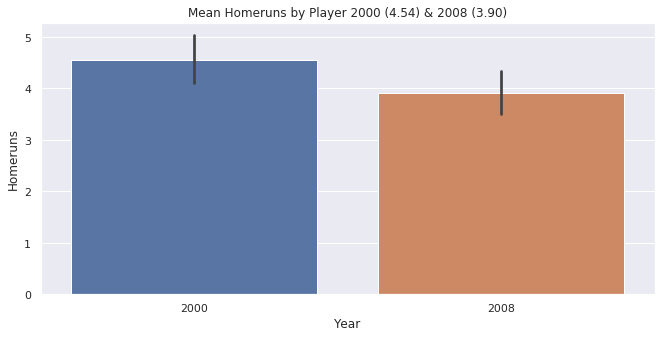

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot(x="Year", y="HR", data=pd.concat([AL_NL_batting2000, AL_NL_batting2008]))
plt.xlabel('Year')
plt.ylabel('Homeruns')
plt.title('Mean Homeruns by Player 2000 (4.54) & 2008 (3.90)')
plt.show()

2004 vs. 2008:

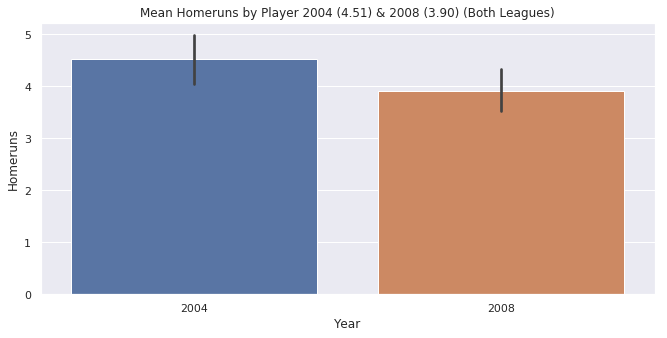

In [ ]:
plt.figure(figsize = (11,5))
sns.barplot(x="Year", y="HR", data=pd.concat([AL_NL_batting2004, AL_NL_batting2008]))
plt.xlabel('Year')
plt.ylabel('Homeruns')
plt.title('Mean Homeruns by Player 2004 (4.51) & 2008 (3.90) (Both Leagues)')
plt.show()

I am encouraged by my findings here and I will continue to study this subject. Since the penalties for testing positive are now more severe, I wonder what the hitting numbers look like. I'd like to create some more datasets, maybe post 2008-present and run statistical tests on them. There was a sizable number of pitchers that tested positive and were suspended (on the publicized list from 2003 and in the Mitchell Report). I'm curious now to look at Pitching stats over the years too. Maybe PEDs affected ERA or pitching speed(?) I don't know. 

But for now, That's all, folks!

In [ ]:
:)